# To Predict --> If client will subscribe a Term Deposit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
bank=pd.read_excel('C:/Users/ancha/Downloads/bank-full.xlsx')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### EDA

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [6]:
#Custom binary encoding
bank1['default']=np.where(bank1['default'].str.contains("yes"),1,0)
bank1['housing']=np.where(bank1['housing'].str.contains("yes"),1,0)
bank1['loan']=np.where(bank1['loan'].str.contains("yes"),1,0)
bank1['y']=np.where(bank1['y'].str.contains("yes"),1,0)
bank1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Model Building

In [8]:
#Dividing our data into input and output variables.
x=pd.concat([bank1.iloc[:,0:10],bank1.iloc[:,11:]],axis=1)
y=bank1.iloc[:,10]

In [9]:
#Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\ancha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
classifier.coef_

array([[-1.40484751e-02, -1.99195263e-02,  2.07458299e-05,
        -7.27727236e-01, -2.09843009e-01, -2.52004427e-02,
         3.84394912e-03, -3.93806690e-01,  2.03002533e-03,
        -1.39951771e-01, -2.93139322e-02, -2.75542198e-01,
        -2.93558540e-02, -9.51005138e-03,  6.92072265e-03,
         1.80615503e-01, -1.74573189e-02, -9.66346145e-02,
         3.28248978e-02, -7.59489899e-02,  3.17089428e-03,
         2.68016076e-03,  1.75494210e-02, -1.88662289e-01,
        -1.36437912e-01, -7.59070079e-02, -2.96084932e-01,
         4.96417002e-02,  1.47994597e-02,  9.95235850e-02,
         5.52050991e-02, -4.62279464e-01, -1.47419653e-01,
        -3.49640815e-02,  3.38794131e-01, -4.63961176e-01,
         4.45680538e-02,  2.62422526e-02,  3.13064792e-02,
        -1.55126053e-02, -1.49303882e-02, -8.93631697e-02,
        -5.92307755e-02,  9.44582393e-02, -4.51182127e-01,
        -6.25299604e-02,  1.07419135e-01,  8.12040866e-02]])

In [11]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0    -0.014048
1    -0.019920
2     0.000021
3    -0.727727
4    -0.209843
5    -0.025200
6     0.003844
7    -0.393807
8     0.002030
9    -0.139952
10   -0.029314
11   -0.275542
12   -0.029356
13   -0.009510
14    0.006921
15    0.180616
16   -0.017457
17   -0.096635
18    0.032825
19   -0.075949
20    0.003171
21    0.002680
22    0.017549
23   -0.188662
24   -0.136438
25   -0.075907
26   -0.296085
27    0.049642
28    0.014799
29    0.099524
30    0.055205
31   -0.462279
32   -0.147420
33   -0.034964
34    0.338794
35   -0.463961
36    0.044568
37    0.026242
38    0.031306
39   -0.015513
40   -0.014930
41   -0.089363
42   -0.059231
43    0.094458
44   -0.451182
45   -0.062530
46    0.107419
47    0.081204
dtype: float64

In [12]:
classifier.classes_

array([0, 1])

In [15]:
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(x)[0:25]
pred_prob

array([[0.94447265, 0.05552735],
       [0.97011725, 0.02988275],
       [0.97875028, 0.02124972],
       [0.97489751, 0.02510249],
       [0.88373413, 0.11626587],
       [0.95343686, 0.04656314],
       [0.9412675 , 0.0587325 ],
       [0.88553741, 0.11446259],
       [0.97438495, 0.02561505],
       [0.9786141 , 0.0213859 ],
       [0.95070811, 0.04929189],
       [0.96335339, 0.03664661],
       [0.90485631, 0.09514369],
       [0.97645002, 0.02354998],
       [0.97453128, 0.02546872],
       [0.91477083, 0.08522917],
       [0.96579982, 0.03420018],
       [0.98414509, 0.01585491],
       [0.95339677, 0.04660323],
       [0.97751086, 0.02248914],
       [0.96359428, 0.03640572],
       [0.96108991, 0.03891009],
       [0.96971474, 0.03028526],
       [0.92767385, 0.07232615],
       [0.95666736, 0.04333264]])

## Model Predictions

In [16]:
pred_prob=pd.DataFrame(pred_prob)
pred_prob
pred_prob['y_pred']=classifier.predict(x)[0:25]
pred_prob

,0,1,y_pred
0,0.944473,0.055527,0
1,0.970117,0.029883,0
2,0.978750,0.021250,0
3,0.974898,0.025102,0
4,0.883734,0.116266,0
5,0.953437,0.046563,0
6,0.941267,0.058733,0
7,0.885537,0.114463,0
8,0.974385,0.025615,0
9,0.978614,0.021386,0


In [18]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
#Creating another object and saving the actual data which was in Y.
#Predicted data, which was in y_pred.
y_pred_df=pd.DataFrame({'actual':y,'predictions':classifier.predict(x)})

In [21]:
y_pred_df

,actual,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [23]:
#Cross checking the accuracy, the model prediction and actual values.
print(len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']]))
print(len(y_pred_df))

len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']])/len(y_pred_df)

40306
45211


0.8915087036340713

## Confusion Matrix for model Accuracy

In [27]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[39164   758]
 [ 4147  1142]]


In [25]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])

In [26]:
print('True Positive',TP)
print('True Negative',TN)
print('False Positive',FP)
print('False Negative',FN)

True Positive 1142
True Negative 39164
False Positive 758
False Negative 4147


In [30]:
(39164+1142)/(39164+758+4147+1142)

0.8915087036340713

In [31]:
# As accuracy = 0.89, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classifier.predict_proba(x)[:,1] 

array([0.05552735, 0.02988275, 0.02124972, ..., 0.68124682, 0.08478827,
       0.09414945])

In [32]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
print(auc)

0.5984664044593897


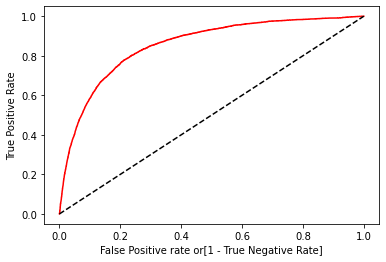

auc accuracy: 0.5984664044593897


In [33]:
plt.plot(fpr,tpr,color='red',label='logic model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')

plt.xlabel('False Positive rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()


print('auc accuracy:',auc)